In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utilities import latex_text_width_1col, colors
from hazma.vector_mediator import KineticMixing, QuarksOnly

**Plots spectra for annihilation into mediators in the vector model.**

In [2]:
# Dark matter masses
mxs = np.array([200.0, 300.0, 400.0])
# Mediator masses
mvs = np.array([175, 225, 275, 325], dtype=float)
# List of models. The top row of the plot will contain the Higgs portal model
# spectra, the bottom the heavy quark model spectra.
vms = [
    KineticMixing(1.0, mv=1.0, gvxx=1.0, eps=0.1),
    QuarksOnly(1.0, mv=1.0, gvxx=1.0, gvuu=1.0, gvdd=-1.0, gvss=0.0),
    QuarksOnly(1.0, mv=1.0, gvxx=1.0, gvuu=1.0, gvdd=1.0, gvss=0.0),
]

# Approximate Milky Way velocity dispersion, used to compute the DM
# center of mass energy
vx_mw = 1e-3

# Photon energies
e_gam_min, e_gam_max = 5.0, 4e2
e_gams = np.geomspace(e_gam_min, e_gam_max, 250)

# Plot dimensions
n_subplot_rows, n_subplot_cols = len(vms), len(mxs)


# Color map for mediator masses
def cmap(mv):
    return colors[np.where(mvs == mv)[0][0]]


# Label positions for mediator masses
# Labels for spectra in each subplot
mv_labels = np.array(
    [
        [{175.0: (1.25e1, 8e-3)}, {}, {}],
        [{}, {225: (4e1, 2.7e-2)}, {}],
        [{}, {275.0: (2e1, 5e-2)}, {325.0: (1e2, 4e-2)}],
    ]
)

/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:141: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.Spectrum(photon_energies, pion_energy, mode)
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:141: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.Spectrum(photon_energies, pion_energy, mode)
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:141: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.Spectrum(photon_energies, pion_energy, mode)
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:141: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.Spectrum(photon_energies, pion_energy, mode)
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/vector_mediator/_vector_mediator_spectra.py:112: IntegrationWarning: The occurrence of roundoff error is detec

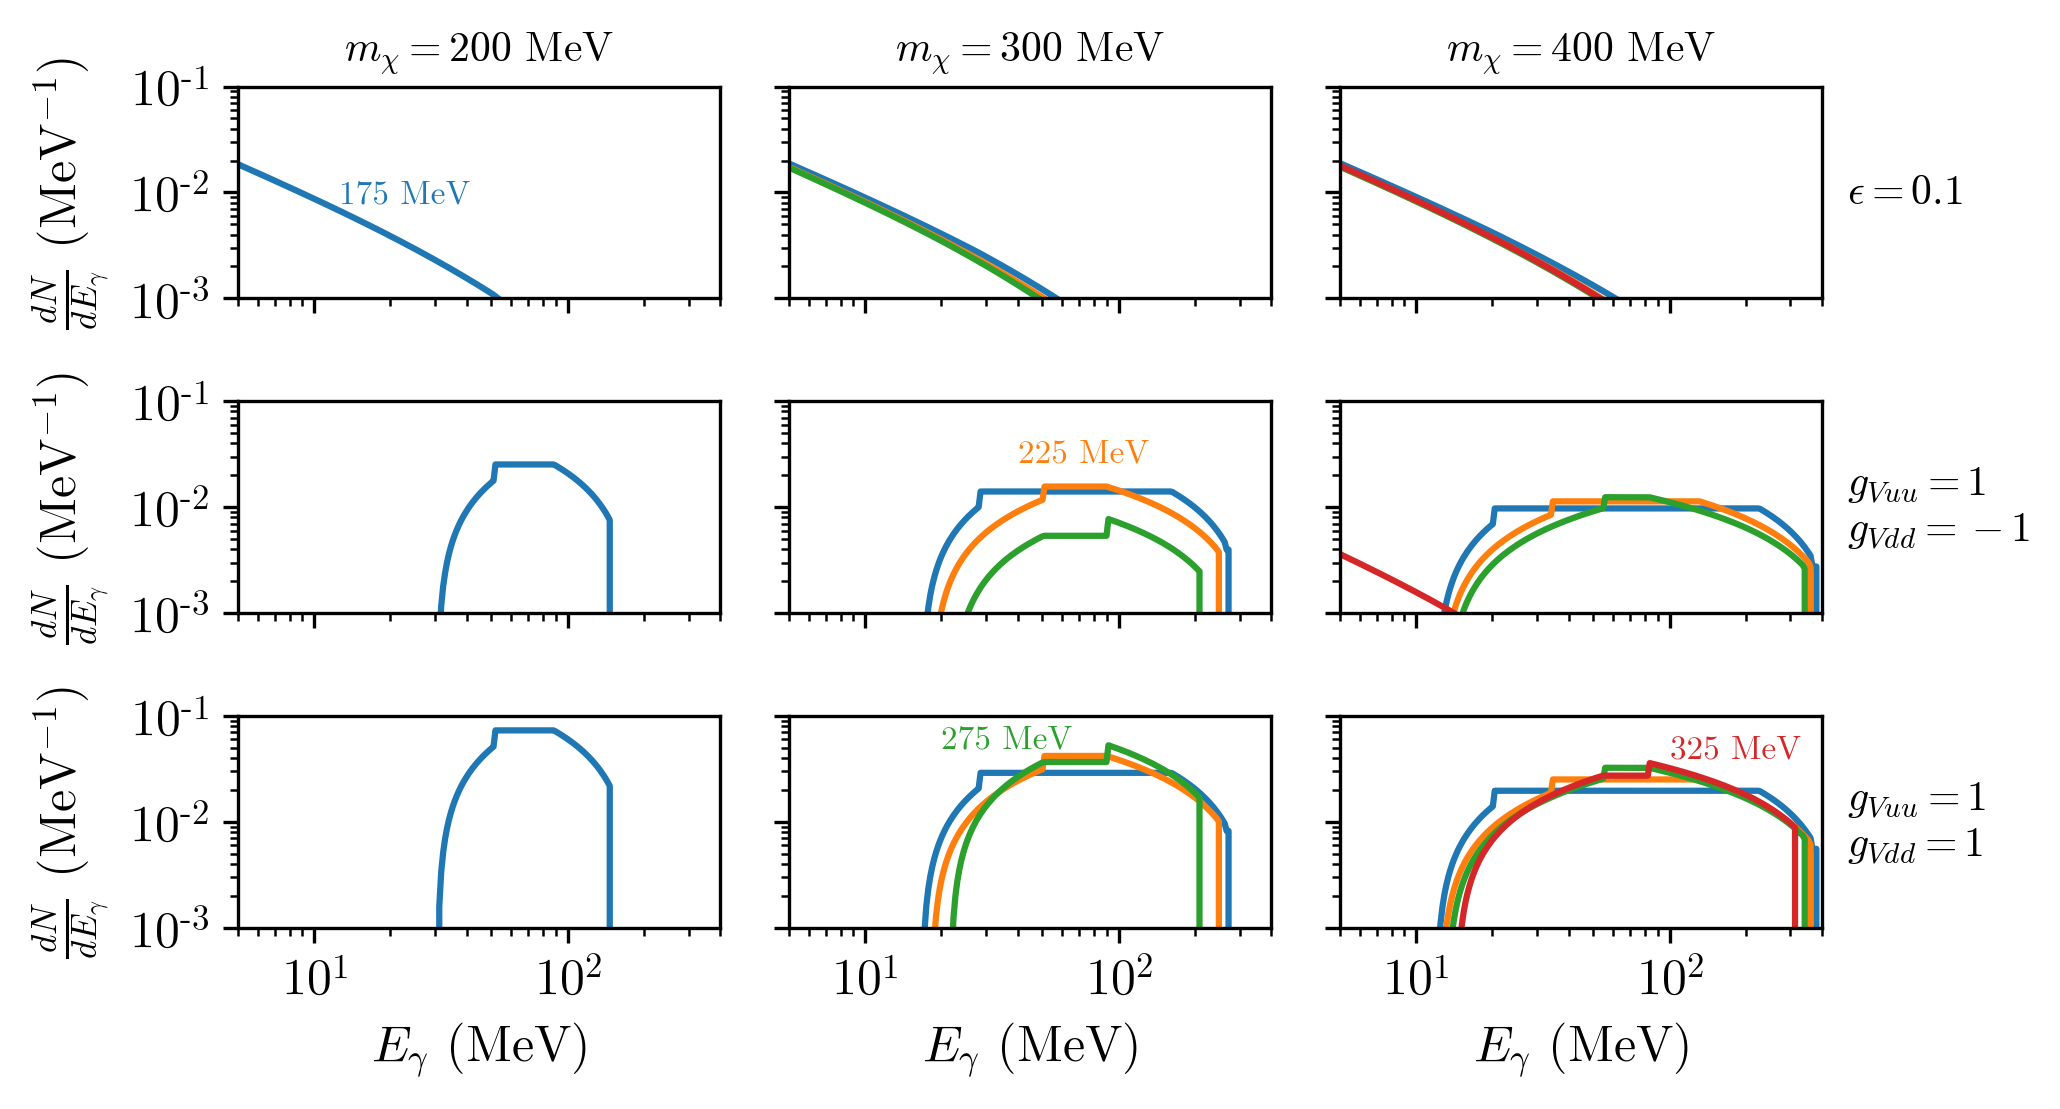

In [3]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col),
)

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]

        # Get the model and set DM mass to column's value
        vm = vms[row]
        vm.mx = mxs[col]
        # DM center of mass energy
        e_cm = 2.0 * vm.mx * (1.0 + 0.5 * vx_mw ** 2)

        # Loop over mediator masses
        for mv in mvs:
            if mv <= e_cm / 2:
                vm.mv = mv
                # Compute spectrum for annihilation to mediators
                ax.loglog(e_gams, vm.spectra(e_gams, e_cm)["v v"], color=cmap(vm.mv))

        # Formatting: label final states
        for mv, (x, y) in mv_labels[row, col].items():
            ax.text(x, y, r"%i MeV" % mv, fontsize=8, color=cmap(mv))

# Formatting
for row in range(n_subplot_rows):
    axes[row, 0].set_ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
    axes[row, 0].set_ylim(1e-3, 1e-1)

for col in range(n_subplot_cols):
    axes[0, col].set_title(r"$m_\chi = %i$ MeV" % mxs[col], fontsize=10)
    axes[-1, col].set_xlabel(r"$E_\gamma$ (MeV)")
    axes[-1, col].set_xlim(e_gam_min, e_gam_max)

# Label couplings
axes[0, -1].text(5e2, 1e-2, r"$\epsilon = 0.1$", va="center", fontsize=10)
axes[1, -1].text(
    5e2, 1e-2, r"$g_{Vuu} = 1$" + "\n" + r"$g_{Vdd} = -1$", va="center", fontsize=10
)
axes[2, -1].text(
    5e2, 1e-2, r"$g_{Vuu} = 1$" + "\n" + r"$g_{Vdd} = 1$", va="center", fontsize=10
)

fig.tight_layout()
fig.savefig("figures/vector_spectra_ann_to_med.pdf", bbox_inches="tight")
plt.show()